##Файзуллов Айрат

- (1 pts) Покажите, что если матрица $A$ обратима, то $\|A^{-1}\|_F \geq \frac{\sqrt{n}}{\|A\|_F}$

По свойству субмультипликативности:
$\|AA^{-1}\|_F \leq \|A\|_F\|A^{-1}\|_F$ \\
$AA^{-1} = I, \ \|I\|_F = \sqrt n$, т.к. Фробениусова норма это квадрат суммы элементов матрицы, а в матрице $I$ есть только $n$ единиц \\
$\sqrt n \leq \|A\|_F\|A^{-1}\|_F ⇒ \|A^{-1}\|_F \geq \frac{\sqrt{n}}{\|A\|_F}$

- (3 pts) Рассмотрим матрицу $A = \begin{bmatrix} I & a \\ a^{\top} & 0 \end{bmatrix}$. Когда она является обратимой? Пусть она обратима, тогда найдите выражение для $A^{-1}$

$\begin{bmatrix} A & B \\ C & D \end{bmatrix}$ - блочная матрица \\

$\begin{bmatrix} A & B \\ C & D \end{bmatrix} = \begin{bmatrix} I & 0 \\ CA^{-1} & I \end{bmatrix} \begin{bmatrix} A & 0 \\ 0 & D-CA^{-1}B \end{bmatrix} \begin{bmatrix} I & A^{-1}B \\ 0 & I \end{bmatrix}$ \\
Вычисляя определитель от блочной матрицы, нам придется считать только определитель от матрицы $\begin{bmatrix} A & 0 \\ 0 & D-CA^{-1}B \end{bmatrix}$, т.к. у других матрицах на диагоналях стоят единицы. \\
$det\begin{bmatrix} A & 0 \\ 0 & D-CA^{-1}B \end{bmatrix} = det(A)det(D-CA^{-1}B) = det(AD - CB)$ \\
Чтобы матрица была обратимой, нам необходимо, чтобы её определитель был отличен от нуля, исходя из выкладок выше мы можем найти определитель матрицы  $det\begin{bmatrix} I & a \\ a^{\top} & 0 \end{bmatrix} = -det(aa^T)$ \\
произведение вектора строки на вектор столбец дает значение, равное сумме квадратов элементов вектора, следоавтельно матрица $A$ является обратимой только при условии что сумма квадратов элемнтов вектора $a$ отлично от нуля. \\


- (2 pts) Получите аналитически выражение обратной матрицы для следующей блочно-треугольной матрицы

$$ 
\begin{bmatrix} A_{11} & 0 \\ A_{21} & A_{22} \end{bmatrix}.
$$

$$ 
\begin{bmatrix} A_{11} & 0 \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} A & B \\ C & D \end{bmatrix} = \begin{bmatrix} I & 0 \\ 0 & I \end{bmatrix}
$$
Получаем систему
$$
A_{11}A = I \\
A_{11}B = 0 \\
A_{21}A + A_{22}C = 0 \\
A_{21}B + A_{22}D = I \\
$$
Следовательно: \\
$$
A = A_{11}^{-1} \\
B = 0 \\
A_{21}A_{11}^{-1} + A_{22}C = 0 \\
A_{22}D = I \\
$$
Следовательно:
$$
A = A_{11}^{-1} \\
B = 0 \\
C = -A_{22}^{-1}A_{21}A_{11}^{-1} \\
D = A_{22}^{-1} \\
$$
Получаем обратную матрицу: \\
$$
\begin{bmatrix} A_{11}^{-1} & 0 \\ -A_{22}^{-1}A_{21}A_{11}^{-1} & A_{22}^{-1} \end{bmatrix}
$$

### 1. LU разложение для ленточных матриц (7 pts)

Сложность вычисления LU разложения для матрицы размера $n\times n$ – $\mathcal{O}(n^3)$.
Существенного уменьшения сложности можно добиться для матриц определённой структуры, например разреженных. 
В этой задаче рассмотрим специальный класс разреженных матриц, а именно ленточные матрицы с шириной ленты 3 и 5, которые называются трёхдиагональными и пятидиагональными, соответственно.

- (5 pts) Реализуйте функцию ```band_lu(diag_broadcast, n)```, которая вычисляет LU разложение для пяти- или трёхдиагональной матрицы, на основании данных значений на диагоналях. Предполагается, что на главной диагонали фактора ```L``` стоят 1.
Например, входные параметры ```(diag_broadcast = [3,-5,4], n = 4)``` означают, что необходимо найти LU разложение для трёхдиагональной матрицы вида:

$$A = \begin{pmatrix}
-5 & 4 & 0 & 0\\
3 & -5 & 4 & 0 \\
0 & 3 & -5 & 4 \\
0 & 0 & 3 & -5 \\
\end{pmatrix}.$$

Функция должна возвращать двумерные NumPy массивы ```L``` и ```U```, в которых хранятся диагонали факторов. Например, ```L[0]``` содержит первую под-диагональ (поскольку на главной диагонали стоят 1, то её возвращать не нужно), ```L[1]``` – вторую под-диагональ и т.д.), аналогично для $U$ (```U[:,0]``` содержит главную диагональ, ```U[:,1]``` содержит первую над-диагональ и т.д.). Прототип функции приведён ниже и не должен меняться.
- (2 pts) Сравните время вычисления LU разложения с помощью стандартной функции в ```scipy```, которая ничего не знает о структуре матрицы, и вашей реализацией LU разложения для ленточной матрицы. Объясните результат. Постройте график зависимости времени факторизации от размерности факторизуемой матрицы. Выберите интервал размерностей факторизуемой матрицы так, чтобы динамика зависимости времени от размерности была различима. При необходимости используйте логарифмический масштаб по оси ```y```.

###Выполним первый пункт задачи для случая трёхдиагональной матрицы
Исходя из логики, что  $u_{ij} = a_{ij} - \sum_{k=1}^{i-1}l_{ik}\cdot u_{kj}$ и 
$l_{ij} = (a_{ij} - \sum_{k=1}^{i-1}l_{ik}\cdot u_{kj})/u_{jj}$, где $a_{ij}$ являются элементами матрицы $A$, а $l_{ij}, u_{ij}$ элементами нижнедиагональной и верхнедиагональных матриц, образованных от матрицы $A$. Исходя из этого получим наш алгоритм для трехдиагональной матрицы, в котором выполняются реккурентные соотношения для первой подиагонали элементов матрицы $L$ ($l$) и главной диагонали матрицы $U$ ($u$). $u_0 = a, l_0 = \frac{c}{a}, u_1 = a - l_0\cdot b, l_1 = \frac{c}{u_1}$ и т.д., где $a$ - элемент на главной диагонали $A$, $c$ - элемент первой подиагонали матрицы $A$, $b$ - элемент первой над-диагонали матрицы $A$

In [3]:
import numpy as np


def band_lu(diag_broadcast, n):
    L = np.zeros((1, n))
    U = np.zeros((2, n))
    a = diag_broadcast[1]
    b = diag_broadcast[2]
    c = diag_broadcast[0]
    for i in range(n - 1):
        U[0][i] = a - L[0][i - 1]*b
        L[0][i] = c/U[0][i]
        U[1][i] = b
    U[0][n - 1] = a - L[0][n - 2]*b
    return L, U.T

In [9]:
diag_broadcast = [10, 24, 4]
n = 1000

Замеряем время для нашей функции

In [55]:
%timeit -o band_lu(diag_broadcast, n)


1.83 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 1.83 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [11]:
L, U = band_lu(diag_broadcast, n)

Создадим двумерный массив в numpy, являющийся трёхдиагональной матрицей

In [44]:
Check_array = np.zeros((n, n))
for i in range(n):
  Check_array[i][i] = diag_broadcast[1]
  if i != 0:
    Check_array[i][i-1] = diag_broadcast[0]
  if i != (n-1):
    Check_array[i][i+1] = diag_broadcast[2]
print(Check_array)


[[24.  4.  0. ...  0.  0.  0.]
 [10. 24.  4. ...  0.  0.  0.]
 [ 0. 10. 24. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 24.  4.  0.]
 [ 0.  0.  0. ... 10. 24.  4.]
 [ 0.  0.  0. ...  0. 10. 24.]]


Замеряем время для scipy

In [13]:
from scipy.linalg import lu
%timeit -o lu(Check_array)


38.5 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 38.5 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

Оценим погрешность

In [14]:
L_2d = np.eye(n) + np.diag(L[0][:-1], k = -1)
U_2d = np.diag(U[:,0]) + np.diag(U[:,1][:-1], k = 1)
print(np.linalg.norm(Check_array - L_2d @ U_2d))

0.0


Сделаем вывод, что L и U были найдены верно

In [54]:
from time import time
tm = []
count = []
for i in range (10, 10000, 200):
  count.append(i)
  time_begin = time()
  band_lu(diag_broadcast, i)
  time_end = time()
  tm.append(time_end - time_begin)


Время LU разложения, по нашей функции, видим, что время не превышает 2 милисекунд

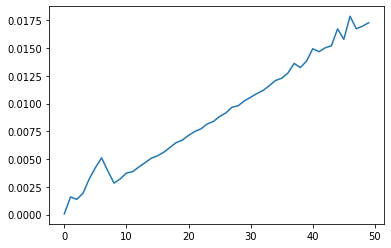

In [16]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(tm)
plt.show()

In [46]:
tm2 = []
for i in range (10, 10000, 200):
  Check_array = np.zeros((i, i))
  for j in range(i):
    Check_array[j][j] = diag_broadcast[1]
    if j != 0:
      Check_array[j][j-1] = diag_broadcast[0]
    if j != (i-1):
      Check_array[j][j+1] = diag_broadcast[2]
  time_begin2 = time()
  lu(Check_array)
  time_end2 = time()
  tm2.append(time_end2 - time_begin2)

Время LU разложения для функции scipy, видим, что время заметно увеличиается от кол-ва элементов n

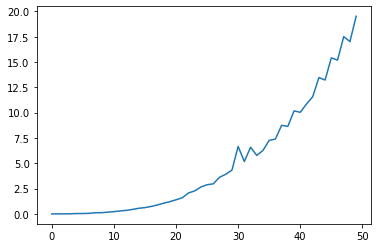

In [47]:

plt.plot(tm2)
plt.show()

Сравним время работы функции scipy и band_lu

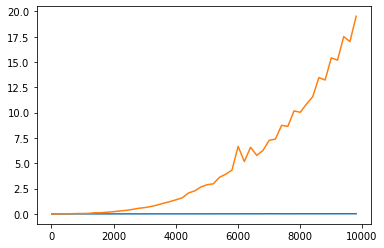

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(count, tm, count, tm2)

Сделаем вывод, что знание типа матрицы дает очень большой выигрыш в скорости построения LU разложения

### 2. Устойчивость LU разложения (13 pts)

Рассмотрим матрицу вида
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (7 pts) Реализуйте алгоритм вычисления LU разложения без выбора ведущего элемента и с выбором (выберете один из способов, рассмотренных на лекции). Обратите внимание на эффективность вашей реализации, в частности перестановки необходио хранить как векторы, а не матрицы.
* (3 pts) Покажите, что ваши реализации работают корректно и согласуются с теорией, то есть вычислите выражение $\| A - PLUQ\|_F$ для тестовых примеров (один их них приведён выше)
* (3 pts) Объясните, почему алгоритм вычисления LU разложения без выбора ведущего элемента плохо аппроксимирует факторы $L$ и $U$ для $|\varepsilon|\ll 1$ в приведённой выше матрице в машинной арифметике? Покажите это явным вычислением.

Алгоритм без выбора ведущего элемента

In [215]:
def LU_no_leading_element(A):
  U = np.copy(A)
  L = np.eye(len(A))
  for i in range(len(A)):
    tmp = U[i + 1:, i] / U[i,i] #dif to make zeros in substraction
    L[i + 1:,i] = tmp
    tmp_new = tmp[:,np.newaxis]
    U[i+1:] = U[i+1:] -  tmp_new * U[i]
  return L, U

Алгоритм с выбором ведущего элемента

In [216]:
def LU_leading_element(A):
    P = np.arange(len(A))
    Q = np.arange(len(A))
    U = np.copy(A)
    L = np.eye(len(A))
    for i in range(len(A)):
      max_in_row = np.max(U[i:,i])
      if max_in_row != U[i, i]:
        find = np.argwhere(U[i:,i] == max_in_row)
        U[[i, i + find[0][0]]] = U[[i + find[0][0], i]]
        save = P[i]
        P[i] = P[i + find[0][0]] 
        P[i + find[0][0]] = save
    for i in range(len(A)):
      max_in_line = np.max(U[i, i:])
      if max_in_line != U[i, i]:
        find = np.argwhere(U[i, i:] == max_in_line)
        U[:, [i, i + find[0][0]]] = U[:, [i + find[0][0], i]]
        save = Q[i]
        Q[i] = Q[i + find[0][0]] 
        Q[i + find[0][0]] = save
    for i in range(len(A)):
      tmp = U[i + 1:, i] / U[i,i] 
      L[i + 1:,i] = tmp
      tmp_new = tmp[:,np.newaxis]
      U[i+1:] = U[i+1:] -  tmp_new * U[i]
    return L, U, P, Q

Протестируем наши алгоритмы, на входной матрице $$ 
\begin{bmatrix} 
1 & 8 & 1 \\ 
5 & 6 & 9\\
2 & 3 & 4 
\end{bmatrix}.
$$

In [217]:
X = np.array([[1., 8., 1.], [5., 6., 9.], [2., 3., 4.]])
L, U = LU_no_leading_element(X)
print("Матрица L:")
print(L)
print("Матрица U:")
print(U)
print("Ошибка:")
print(np.linalg.norm(L @ U - X))

Матрица L:
[[1.         0.         0.        ]
 [5.         1.         0.        ]
 [2.         0.38235294 1.        ]]
Матрица U:
[[  1.           8.           1.        ]
 [  0.         -34.           4.        ]
 [  0.           0.           0.47058824]]
Ошибка:
8.881784197001252e-16


Видим, что у алгоритма без выбора ведущего элемента присутсвует небольшая ошибка

In [218]:
L, U, P, Q = LU_leading_element(X)
print("Матрица L:")
print(L)
print("Матрица U:")
print(U)
print("Ошибка:")
print(np.linalg.norm(L @ U - X[P][:, Q]))

Матрица L:
[[1.         0.         0.        ]
 [0.11111111 1.         0.        ]
 [0.44444444 0.04545455 1.        ]]
Матрица U:
[[ 9.          6.          5.        ]
 [ 0.          7.33333333  0.44444444]
 [ 0.          0.         -0.24242424]]
Ошибка:
0.0


Видим, что у матрицы с выбором ведущего элемента ошибка минимальна

Протестируем на тесте:
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
28 & \varepsilon & 1 \\
12 & 23 & 14
\end{pmatrix}.$ 

In [236]:
X = np.array([[1e-20, 45., 12.], [28., 1e-20, 1.], [12., 23., 14.]])
L, U = LU_no_leading_element(X)
print("Ошибка:")
print(np.linalg.norm(L @ U - X))

Ошибка:
1903651.0636833347


Видим огромную ошибку

In [237]:
X = np.array([[1e-20, 45., 12.], [28., 1e-20, 1.], [12., 23., 14.]])
L, U, P, Q = LU_leading_element(X)
print("Ошибка:")
print(np.linalg.norm(L @ U - X[P][:, Q]))

Ошибка:
0.0


Видим, что ошибка минимальна

Протестируем на тесте:
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 

Посчитаем разными методами LU разложение и оценим погрешность с помошью вычисления $\| A - PLUQ\|_F$

In [225]:
X = np.array([[1e-100, 1., 0.], [1., 1., 1.], [0., 1., 1.]])
L, U = LU_no_leading_element(X)
print("Ошибка:")
print(np.linalg.norm(L @ U - X))

Ошибка:
1.0


In [226]:
X = np.array([[1e-100, 1., 0.], [1., 1., 1.], [0., 1., 1.]])
L, U, P, Q = LU_leading_element(X)
print("Ошибка:")
print(np.linalg.norm(L @ U - X[P][:, Q]))

Ошибка:
0.0


Проверили на тесте с очень малым элементом на диагонали, заметим, что ошибка от выбора ведущего элемента намного меньше ошибки метода без ведущего элемента.

Алгоритм вычисления LU разложения без выбора ведущего элемента плохо аппроксимирует факторы $L$ и $U$ для $|\varepsilon|\ll 1$, т.к. вычисляя матрицу $U$ нам приходится делить на очень малое значение близкое к нулю, что приводит к неточному делению и ко "взрыву" значения, и из-за этого в матрице $U$ появляются очень большие элементы, которые имеют сильно искаженные значения

In [233]:
X = np.array([[1e-100, 1., 0.], [1., 1., 1.], [0., 1., 1.]])
L, U = LU_no_leading_element(X)
print("Матрица L:")
print(L)
print("Матрица U:")
print(U)
print("L @ U")
print(L @ U)

Матрица L:
[[ 1.e+000  0.e+000  0.e+000]
 [ 1.e+100  1.e+000  0.e+000]
 [ 0.e+000 -1.e-100  1.e+000]]
Матрица U:
[[ 1.e-100  1.e+000  0.e+000]
 [ 0.e+000 -1.e+100  1.e+000]
 [ 0.e+000  0.e+000  1.e+000]]
L @ U
[[1.e-100 1.e+000 0.e+000]
 [1.e+000 0.e+000 1.e+000]
 [0.e+000 1.e+000 1.e+000]]


Как можно заметить в U[1][1] возникает очень большое значение, значение котрого сильно округолено и искажено, что приводит при умножнии матрицы L на U, к неверному результату в виде 0, в ячейке [1][1]

In [239]:
X = np.array([[1e-100, 1., 0.], [1., 1., 1.], [0., 1., 1.]])
L, U, P, Q = LU_leading_element(X)
print("Матрица L:")
print(L)
print("Матрица U:")
print(U)


Матрица L:
[[1.e+000 0.e+000 0.e+000]
 [1.e-100 1.e+000 0.e+000]
 [0.e+000 1.e+000 1.e+000]]
Матрица U:
[[ 1.e+000  1.e+000  1.e+000]
 [ 0.e+000  1.e+000 -1.e-100]
 [ 0.e+000  0.e+000  1.e+000]]


Видим, что алгоритм с выбором ведущего элемента хорошо справляется с этой проблемой, т.к. мы меньшие элементы делим на большие, что не приводит ко "взрыву" значений

### 3. Блочное LU разложение (6 pts)

Пусть $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ – блочная матрица. Необходимо решить систему линейных уравнений вида

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Используя процедуру блочного исключения, найдите матрицу $S$ и правую часть $\hat{f_2}$ такую что $u_2$ может быть найден из системы $S u_2 = \hat{f_2}$. Матрица $S$ называется <font color='red'> дополнением по Шуру </font> блока  $A_{11}$.

* (4 pts) Пусть $A_{12} = A_{21}^\top$. Покажите, что если $A_{22} \succ 0$, то $A \succ 0 \Leftrightarrow A_{11} - A_{12} A_{22}^{-1} A_{21} \succ 0$ 

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$
$A_{11}u_1 + A_{12}u_2 = f_1$ \\
$A_{21}u_1 + A_{22}u_2 = f_2$  \\
$u_2 = A_{22}^{-1}(f_2 - A_{21}u_1)$ \\
Подставим $u_2$ в первое уравнение \\
$A_{11}u_1 + A_{12}(A_{22}^{-1}(f_2 - A_{21}u_1)) = f_1$ следоавтельно \\
$(A_{11} - A_{12}A_{22}^{-1}A_{21})u_1 = f_1 - A_{12}A_{22}^{-1}f_2$ \\
матрица $A_{11} - A_{12}A_{22}^{-1}A_{21}$ является матрицой $S$, дополнением по Шуру. \\
$u_2$ будет выражаться через матрицу S, и правую часть: \\
т.к. 
$u_1 = S^{-1}(f_1 - A_{12}A_{22}^{-1}f_2)$ следовательно $u_2 = A_{22}^{-1}(f_2 - A_{21}S^{-1}(f_1 - A_{12}A_{22}^{-1}f_2))$